In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Url = 'https://raw.githubusercontent.com/IT22106360/QuantaML-FDM-Employee-Retention/refs/heads/main/artifacts/preprocessed_dataset.csv'
imbl_dataset = pd.read_csv(Url, encoding='latin-1')
imbl_dataset

,Unnamed: 0,city_development_index,relevent_experience,education_level,experience,last_new_job,target
0,0,0.920,1,2.0,0.0,1.000000,1
1,1,0.776,0,2.0,0.0,5.000000,0
2,2,0.624,0,2.0,0.0,0.000000,0
3,3,0.789,0,2.0,0.0,0.000000,1
4,4,0.767,1,2.0,0.0,4.000000,0
...,...,...,...,...,...,...,...
1521,18944,0.924,0,2.0,0.0,2.188263,0
1522,19043,0.926,0,2.0,3.0,2.188263,0
1523,19113,0.682,0,2.0,6.0,2.188263,0
1524,19139,0.624,1,2.0,4.0,2.188263,0


In [3]:
X = imbl_dataset.drop('target', axis=1)  # Features
y = imbl_dataset['target']  # target variable

In [4]:
X.shape
y.shape

(19158,)

In [5]:
y.value_counts()

target
0    14381
1     4777
Name: count, dtype: int64

Modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def modeler(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

    scaler = StandardScaler()
    x_train =scaler.fit_transform(x_train)
    x_test =scaler.transform(x_test)

    # model training
    model.fit(x_train, y_train)


    y_pred=model.predict(x_test)


        # metrics calculation
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc':auc }


Decision Tree Classifier

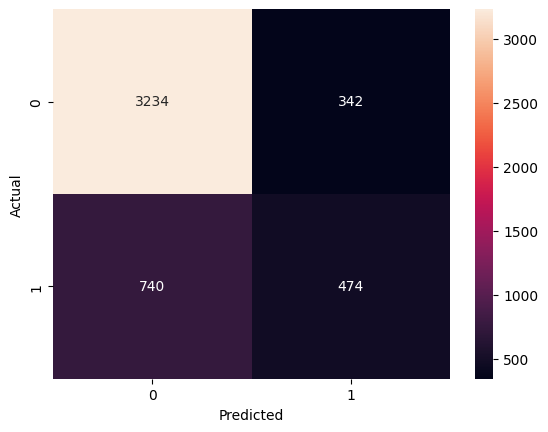

Accuracy: 0.7741127348643007
Precision: 0.5808823529411765
Recall: 0.3904448105436573
F1 Score: 0.4669950738916256
Area Under Curve: 0.6474036133255199


In [7]:
#Rashmika
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini'
                            , max_depth=10
                            , max_features='sqrt'
                            , min_samples_leaf= 1
                            , min_samples_split=2)
DT_Test = modeler(DT, X, y)

print('Accuracy:',DT_Test['acc'])
print('Precision:', DT_Test['prec'])
print('Recall:', DT_Test['rec'])
print('F1 Score:', DT_Test['f1'])
print('Area Under Curve:', DT_Test['auc'])

Random Forrest Classifier

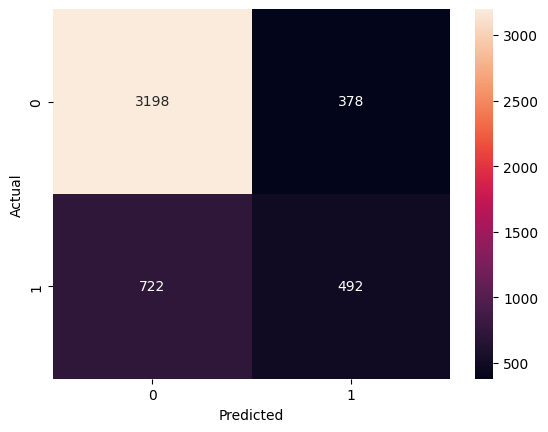

Accuracy: 0.7703549060542797
Precision: 0.5655172413793104
Recall: 0.4052718286655684
F1 Score: 0.472168905950096
Area Under Curve: 0.6497835653394956


In [8]:
#Sakuni

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF_Test = modeler(RF, X, y)

print('Accuracy:',RF_Test['acc'])
print('Precision:', RF_Test['prec'])
print('Recall:', RF_Test['rec'])
print('F1 Score:', RF_Test['f1'])
print('Area Under Curve:', RF_Test['auc'])

Gaussian Naive Bayse

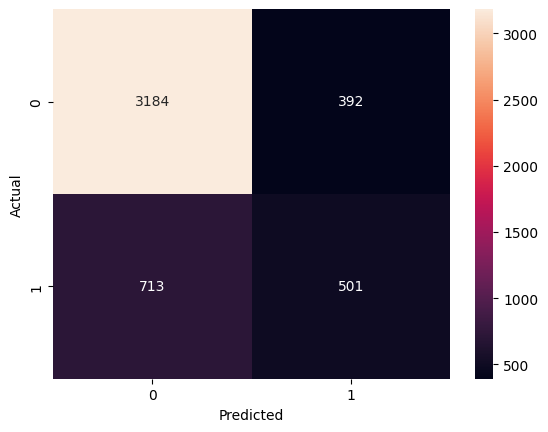

Accuracy: 0.7693110647181628
Precision: 0.561030235162374
Recall: 0.4126853377265239
F1 Score: 0.4755576649264357
Area Under Curve: 0.6515328254628144


In [9]:
#Tehan

from sklearn.naive_bayes import GaussianNB
NB =GaussianNB()

NB_Test= modeler(NB, X, y)

print('Accuracy:',NB_Test['acc'])
print('Precision:', NB_Test['prec'])
print('Recall:', NB_Test['rec'])
print('F1 Score:', NB_Test['f1'])
print('Area Under Curve:', NB_Test['auc'])


Support Vector Machine

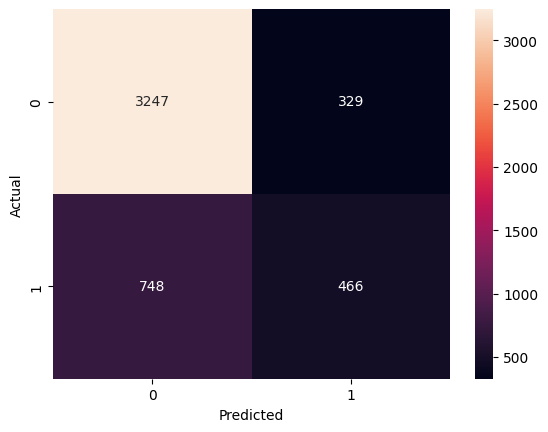

Accuracy: 0.7751565762004176
Precision: 0.5861635220125786
Recall: 0.38385502471169686
F1 Score: 0.46391239422598307
Area Under Curve: 0.6459263937876157


In [10]:
#Wadda

from sklearn.svm import SVC
SVM = SVC(kernel="rbf",C=1,probability=True)


SVM_Test = modeler(SVM , X, y)

print('Accuracy:',SVM_Test['acc'])
print('Precision:', SVM_Test['prec'])
print('Recall:', SVM_Test['rec'])
print('F1 Score:', SVM_Test['f1'])
print('Area Under Curve:', SVM_Test['auc'])

Logistic Regression

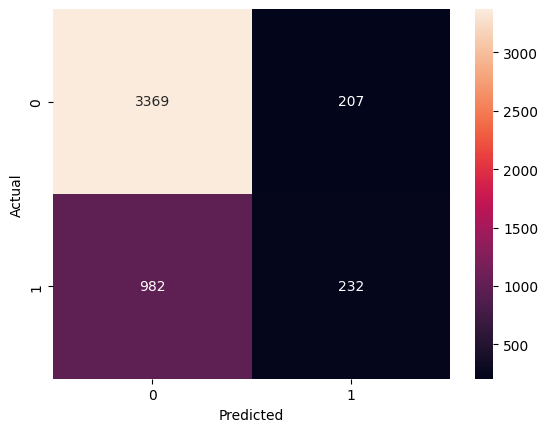

Accuracy: 0.7517745302713987
Precision: 0.5284738041002278
Recall: 0.19110378912685339
F1 Score: 0.2807017543859649
Area Under Curve: 0.5666089415432924


In [11]:
#Vishva

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


LR_Test = modeler(LR, X, y)

print('Accuracy:',LR_Test['acc'])
print('Precision:', LR_Test['prec'])
print('Recall:', LR_Test['rec'])
print('F1 Score:', LR_Test['f1'])
print('Area Under Curve:', LR_Test['auc'])

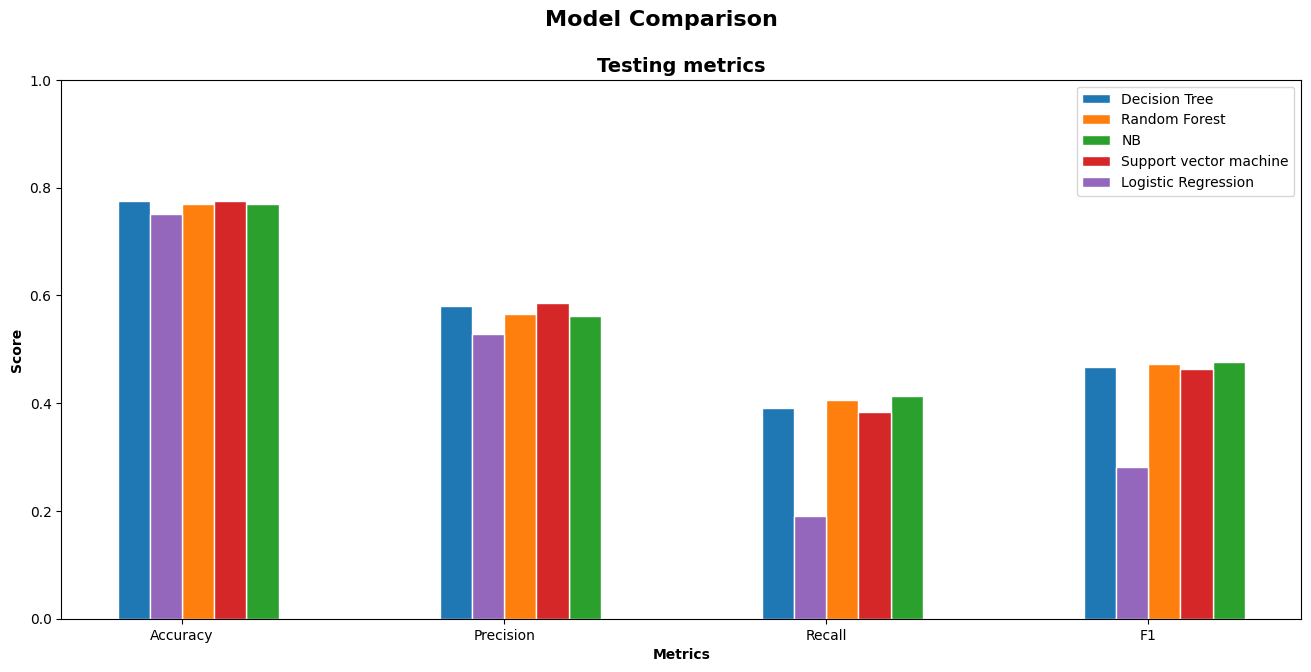

In [14]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(16)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dt_score = [DT_Test['acc'], DT_Test['prec'], DT_Test['rec'], DT_Test['f1']]
rf_score = [RF_Test['acc'], RF_Test['prec'], RF_Test['rec'], RF_Test['f1']]
nb_score  = [NB_Test['acc'], NB_Test['prec'], NB_Test['rec'], NB_Test['f1']]
svm_score = [SVM_Test['acc'], SVM_Test['prec'], SVM_Test['rec'], SVM_Test['f1']]
lr_score = [LR_Test['acc'], LR_Test['prec'], LR_Test['rec'], LR_Test['f1']]

## Set position of bar on x axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5  =[x + barWidth for x in r4]


## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r5, nb_score, width=barWidth, edgecolor='white', label='NB')
ax1.bar(r4, svm_score, width=barWidth, edgecolor='white', label='Support vector machine')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Testing metrics', fontsize=14, fontweight='bold')
ax1.legend()
